# Perceptron

## Overview

In 1943, Warren McCullock and Walter-Pits published the first concept of a simplified brain cell, the so-called __McCullock-Pitts (MCP)__ neuron _(A Logical Calculus of the Ideas Immanent in Nervous Activity, Bulleting of Mathematical Biophysics)_.

A few years later, Frank Rosenblatt published the first concept of perceptron learning rule based on the MCP neuron model. With the perceptron rule, Rosenblatt proposed an algorithm that would automatically learn the optimal weigth coefficients that are then multiplied with the input features in order to make the decision of whether a neuron fires or not.

## Perceptron model

Let $\mathbf{x}$ be input features and $\mathbf{w}$ a corresponding weight vector

$\mathbf{x}=\begin{bmatrix}1 \\ x_1 \\ \vdots \\ x_m \end{bmatrix},\,\,\,\, \mathbf{w}=\begin{bmatrix}w_0 \\ w_1 \\ \vdots \\ w_m \end{bmatrix}$

The perceptron calculates

$\hat{y}=\phi(z)\,\,$ where $z=\mathbf{w}^T \mathbf{x},\,\,\, and$

$\phi(z)=\left\{ \begin{array}{} 1\, if\, z \gt 0 \\ -1\, otherwise\end{array} \right.$

## Perceptron learning

The perceptron learning rule:

Let $\mathcal{D}=\{(\mathbf{x}^{(1)},y^{(1)}),...,(\mathbf{x}^{(m))},y^{(m)}\}$, where $y\in\{-1,1\}$ be a training dataset.

`1. Initialize the weights to small random numbers`

`2. For each training sample` $(\mathbf{x}^{(i},y^{(i)})$:

$\Delta\mathbf{w}=\eta(y^{(i)}-\hat{y}^{(i)})\mathbf{x}^{(i)}$, where $\eta$ is the __learning rate__

$\mathbf{w}=\mathbf{w}+\Delta\mathbf{w}$

`3. Repeat step 2 till convergence or for the set number of epochs`

It is important to note that the convergence of the perceptron is only guaranteed if the two classes are linearly separable and the learning rate is sufficiently small. If the classes can't be separated by a linear decision boundry, you have to explicitly set the maximum number of passes and/or a threshold for the number of tolerated misclassifications. Otherwise the perceptron will never stop.





## Code samples

/home/jarekk/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Text(0,0.5,'petal length')

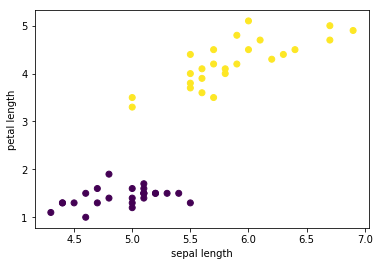

In [112]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


#Load Iris dataset
iris = datasets.load_iris()

# Extract sepal length and petal length
X = iris.data[:, [0,2]] 
y = iris.target

# Filter for Iris=Setosa and Iris-veriscolour
X = X[y != 2, :]
y = y[y != 2]
y = np.where(y == 0, -1, 1)

# Generate 50 random samples
X_train, _, y_train, _ = train_test_split(X, y, train_size=50, random_state=1, stratify=y)

plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train)
plt.xlabel('sepal length')
plt.ylabel('petal length')


In [113]:
# The class encapsulating perceptron training and inferencing

class Perceptron(object):
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)  

In [114]:
# A function for plotting decision regions

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        


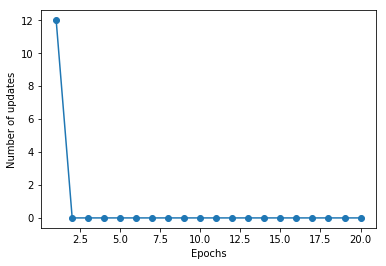

In [115]:
# Train the perceptron model on IRIS

ppn = Perceptron(eta=0.1, n_iter=20)

ppn.fit(X_train, y_train)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

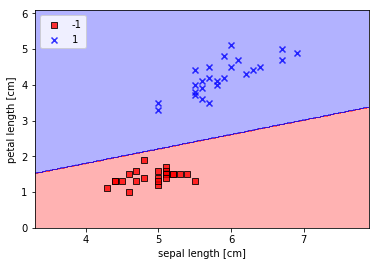

In [116]:
# Display the decision boundry

plot_decision_regions(X_train, y_train, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()
